In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/sayanroy058/Obesity/Obesity Classification.csv")
df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


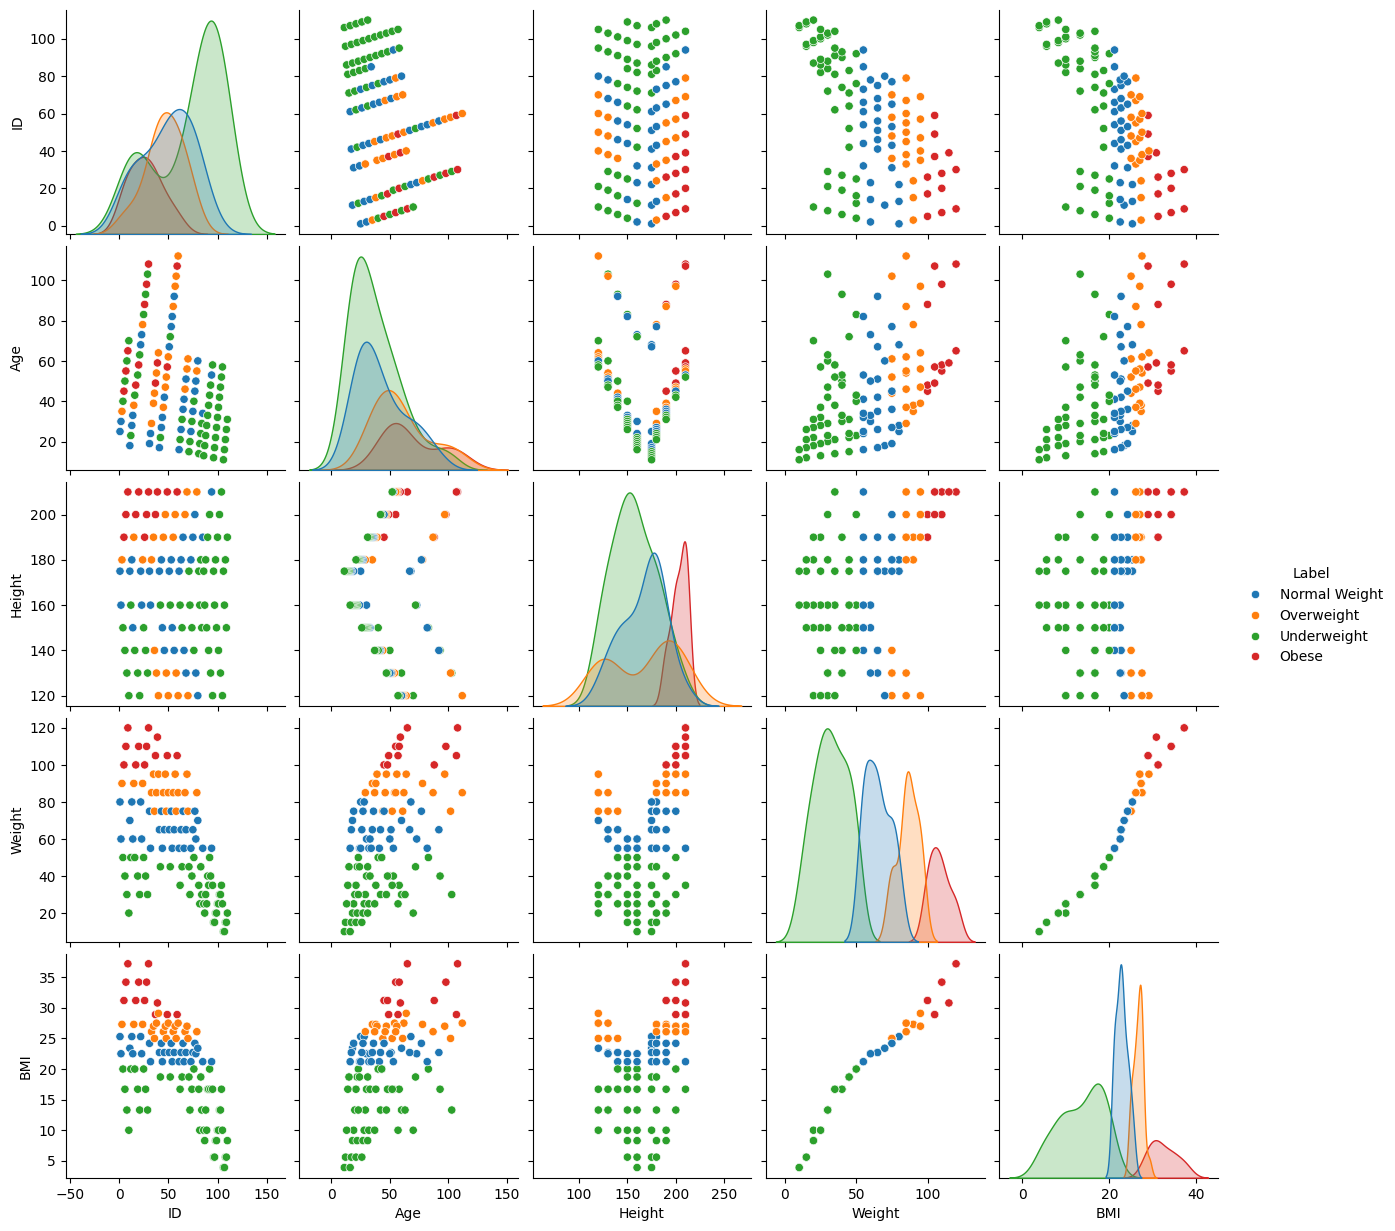

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='Label')
plt.show()

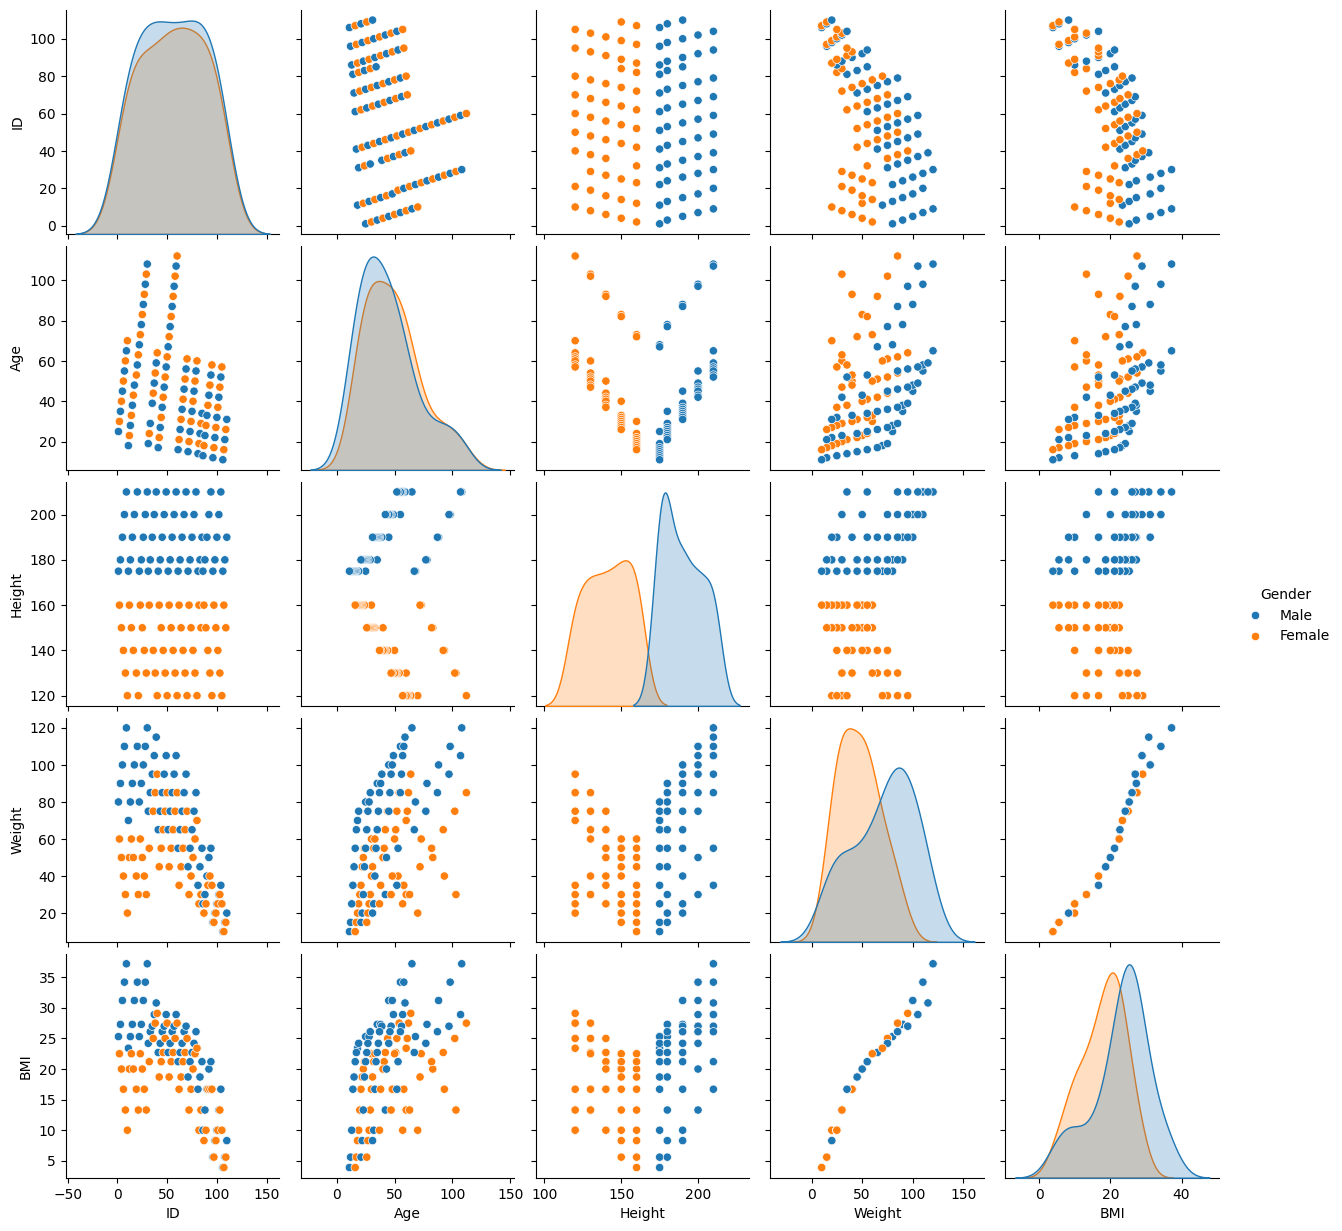

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='Gender')
plt.show()

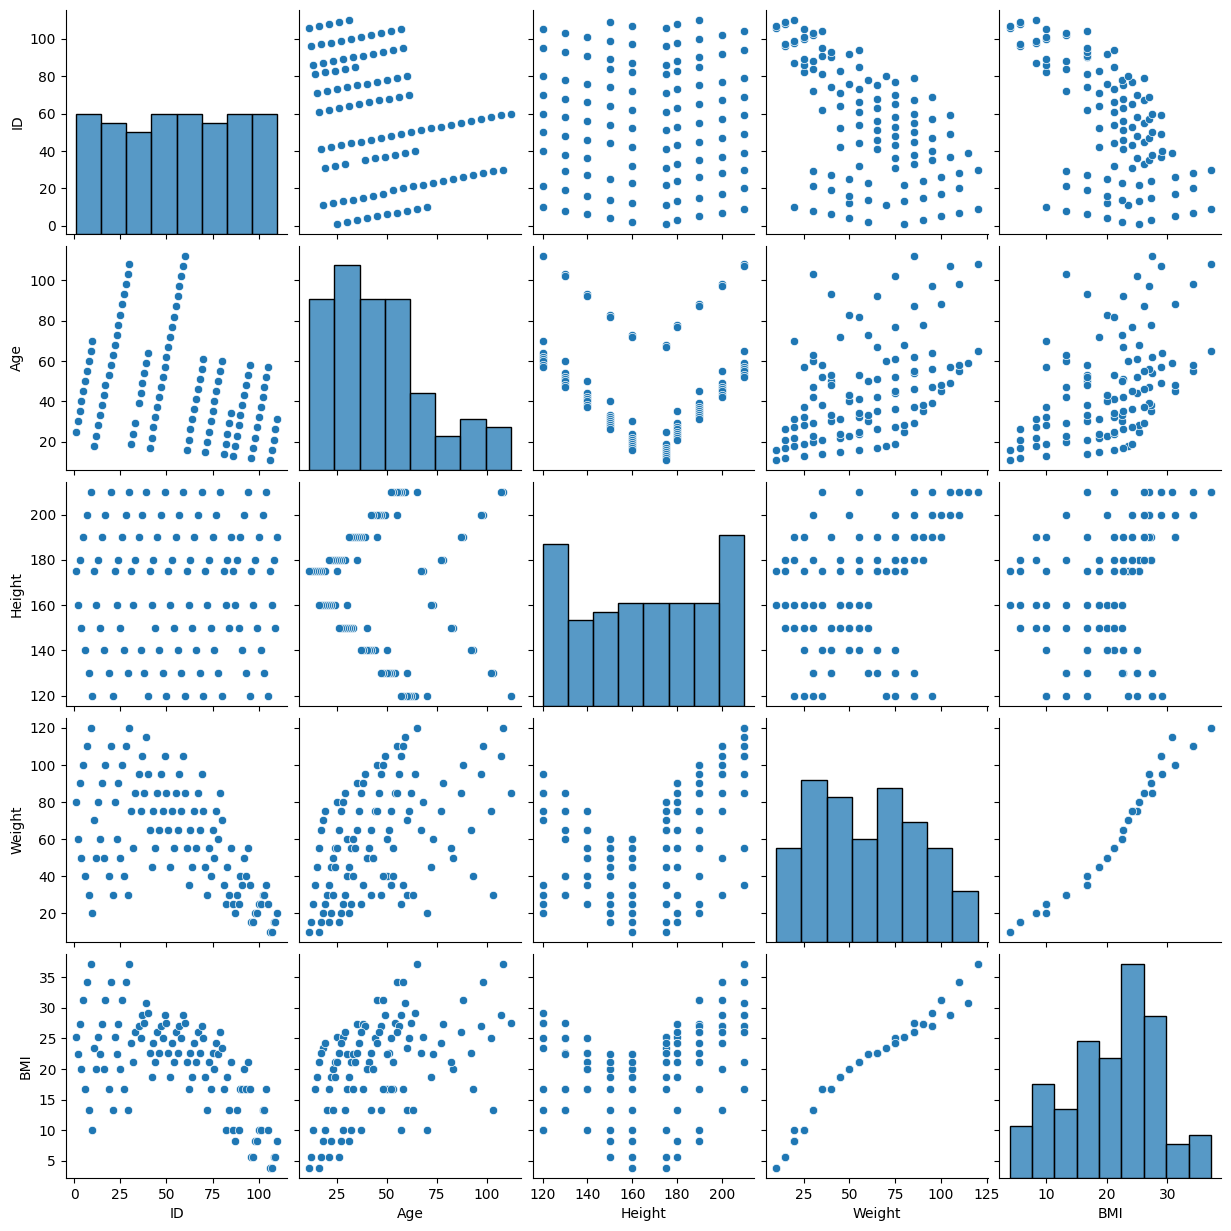

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [5]:
df = df.replace("Female", "0")
df = df.replace("Male", "1")
df = df.replace("Underweight", "0")
df = df.replace("Normal Weight", "1")
df = df.replace("Overweight", "2")
df = df.replace("Obese", "3")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,1
1,2,30,0,160,60,22.5,1
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,0
4,5,45,1,190,100,31.2,3
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,0
104,107,16,0,160,10,3.9,0
105,108,21,1,180,15,5.6,0
106,109,26,0,150,15,5.6,0


In [6]:
df.corr()

,ID,Age,Gender,Height,Weight,BMI,Label
ID,1.000000,-0.298257,-0.005595,-0.008224,-0.572625,-0.615235,-0.459655
Age,-0.298257,1.000000,-0.091964,-0.076896,0.465106,0.474185,0.451868
Gender,-0.005595,-0.091964,1.000000,0.876225,0.418415,0.342342,0.405208
Height,-0.008224,-0.076896,0.876225,1.000000,0.428890,0.354340,0.428596
Weight,-0.572625,0.465106,0.418415,0.428890,1.000000,0.972829,0.935518
BMI,-0.615235,0.474185,0.342342,0.354340,0.972829,1.000000,0.871449
Label,-0.459655,0.451868,0.405208,0.428596,0.935518,0.871449,1.000000


In [8]:
!pip install gplearn

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.76          14291.3        6         0.662764          1.05853     13.81m
   1     4.62          8.68506        2         0.643678              1.3      9.72m
   2     2.75         0.997878        2         0.632184              1.4      5.51m
   3     2.17           0.8652        2         0.643678              1.3      5.64m
   4     1.95          10.0051        1          0.62069              1.5      5.43m
   5     1.74         0.955415        2         0.632184              1.4      5.39m
   6     1.68          5.52595        2         0.632184              1.4      5.12m
   7     1.50          20.9147        1          0.62069              1.5      5.19m
   8     1.36          1.27651        1          0.62069              1.5  

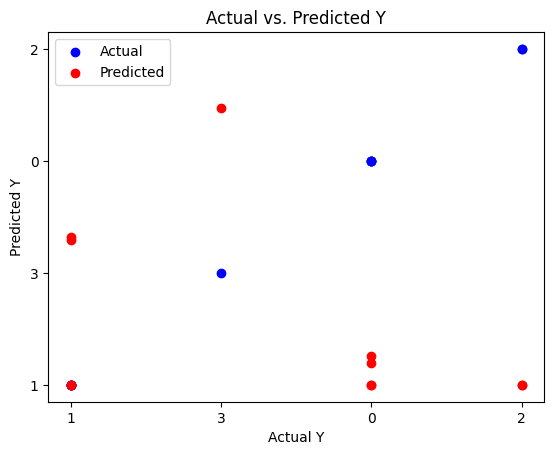

In [31]:
import numpy as np
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
data = df

# Разделение данных на обучающую и тестовую выборки
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создание объекта SymbolicRegressor
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin', 'cos', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=900,
                           function_set=function_set,
                           generations=500,
                           stopping_criteria=0.01,
                           p_crossover=0.3,
                           p_subtree_mutation=0.02,
                           p_hoist_mutation=0.02,
                           p_point_mutation=0.01,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=0,
                           feature_names=X_train.columns)

# Обучение модели
est_gp.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred = est_gp.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Вывод символьную формулы
print('Символьная формула:')
print(est_gp._program)

# Визуализация фактических и предсказанных значений
fig, ax = plt.subplots()
ax.scatter(y_test, y_test, label='Actual', color='blue')
ax.scatter(y_test, y_pred, label='Predicted', color='red')
plt.legend()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Y')
plt.show()

In [32]:
y_gp = est_gp.predict(X_test)
score_gp1 = est_gp.score(X_test, y_test)
score_gp1

-0.057922211111687716

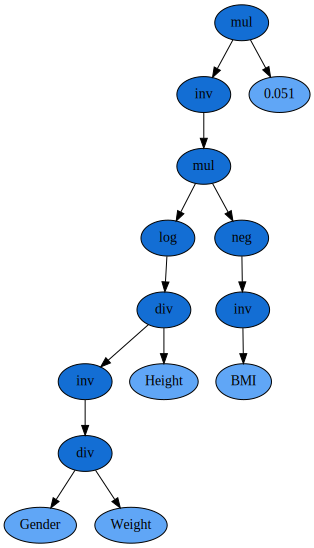

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.utils.random import check_random_state
import graphviz
import time
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1', format='png', cleanup=True)
graph

In [34]:
converter = {
    'add': lambda x, y: x + y,
    'sub': lambda x, y: x - y,
    'mul': lambda x, y: x * y,
    'div': lambda x, y: x / y,
    'neg': lambda x: -x,
    'pow': lambda x, y: x ** y,
    'sin': lambda x: sin(x),
    'cos': lambda x: cos(x),
    'inv': lambda x: 1 / x,
    'sqrt': lambda x: x ** 0.5,
    'pow3': lambda x: x ** 3
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

-0.051*BMI/log(Weight/(Gender*Height))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.76          4217.09        5          8.80492          7.89723     20.52m
   1     8.72          81.3169        6          4.71241          4.55079      5.89m
   2     8.01          53.3188        7          3.26837          3.29195      6.14m
   3    12.03          2845.27        9          2.22883          2.21689      8.02m
   4     6.63          580.622        9          2.15348          2.87251      9.70m
   5     7.23          2881.57       15          1.28711          1.31211     11.65m
   6     9.08          2902.38       15          1.20333            2.041      6.19m
   7    11.33          574.796       15          1.18785          2.17571      6.41m
   8     7.18          24.1631        9          1.17953          1.61151  

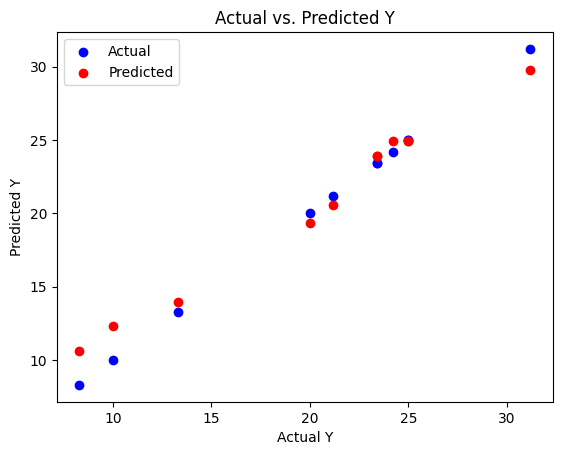

In [35]:
import numpy as np
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
data = df

# Разделение данных на обучающую и тестовую выборки
X = data.drop('BMI', axis=1)
y = data['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создание объекта SymbolicRegressor
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin', 'cos', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=900,
                           function_set=function_set,
                           generations=500,
                           stopping_criteria=0.01,
                           p_crossover=0.3,
                           p_subtree_mutation=0.02,
                           p_hoist_mutation=0.02,
                           p_point_mutation=0.01,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=0,
                           feature_names=X_train.columns)

# Обучение модели
est_gp.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred = est_gp.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Вывод символьную формулы
print('Символьная формула:')
print(est_gp._program)

# Визуализация фактических и предсказанных значений
fig, ax = plt.subplots()
ax.scatter(y_test, y_test, label='Actual', color='blue')
ax.scatter(y_test, y_pred, label='Predicted', color='red')
plt.legend()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Y')
plt.show()

In [36]:
y_gp = est_gp.predict(X_test)
score_gp1 = est_gp.score(X_test, y_test)
score_gp1

0.9693616579461574

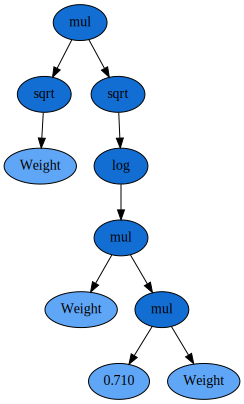

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.utils.random import check_random_state
import graphviz
import time
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1', format='png', cleanup=True)
graph

In [38]:
converter = {
    'add': lambda x, y: x + y,
    'sub': lambda x, y: x - y,
    'mul': lambda x, y: x * y,
    'div': lambda x, y: x / y,
    'neg': lambda x: -x,
    'pow': lambda x, y: x ** y,
    'sin': lambda x: sin(x),
    'cos': lambda x: cos(x),
    'inv': lambda x: 1 / x,
    'sqrt': lambda x: x ** 0.5,
    'pow3': lambda x: x ** 3
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

Weight**0.5*log(0.71*Weight**2)**0.5

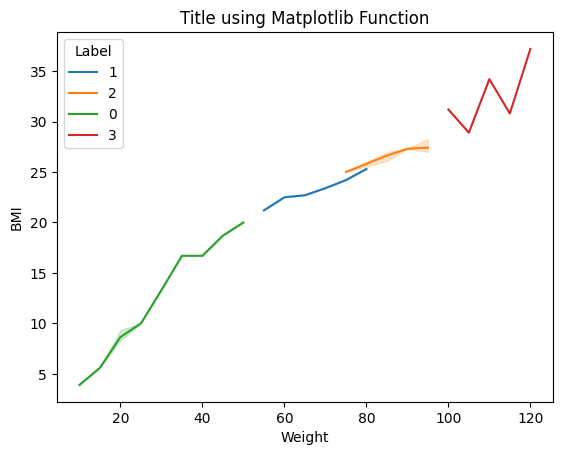

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# draw lineplot
sns.lineplot(x="Weight", y="BMI", data=df,hue='Label')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

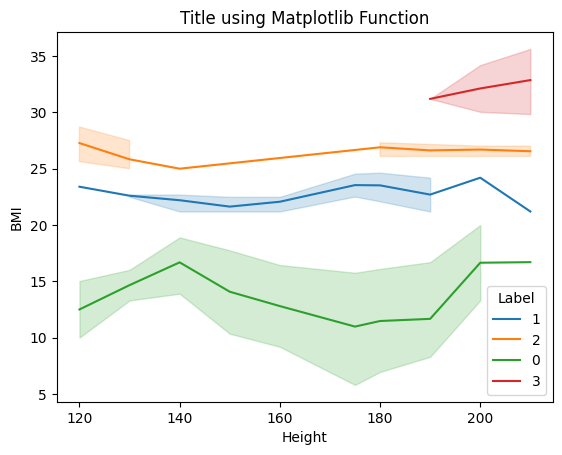

In [43]:
sns.lineplot(x="Height", y="BMI", data=df,hue='Label')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

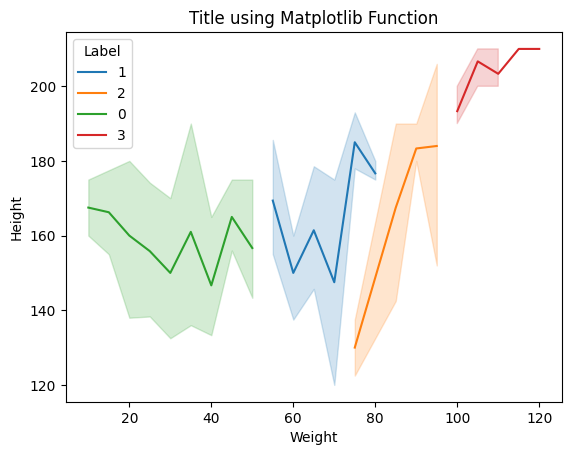

In [44]:
sns.lineplot(x="Weight", y="Height", data=df,hue='Label')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['Label','ID'],axis= 1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.20484501024511018
mean_absolute_error :  0.3591475721260182


In [49]:
model.intercept_

-1.3537761789158382

In [50]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[0.001, -0.135, 0.005, 0.027, -0.008]


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['Label','ID','Age'],axis= 1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.20236137708142246
mean_absolute_error :  0.3571204118642565


In [54]:
model.intercept_

-1.245012664154001

In [55]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-0.149, 0.004, 0.027, -0.006]


In [56]:
X = df.drop(['Label','ID','Age','Height'],axis= 1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.19794925794063026
mean_absolute_error :  0.3572574845715549


In [57]:
model.intercept_

-0.7233953019871342

In [58]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[0.009, 0.028, -0.007]


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['BMI','ID','Label'],axis= 1)
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  3.3531239556926726
mean_absolute_error :  1.4199555599424636


In [63]:
model.intercept_

3.7111297126963976

In [64]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[0.018, -0.31, 0.01, 0.249]


In [65]:
X = df.drop(['BMI','ID','Label','Age'],axis= 1)
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  3.02678603589088
mean_absolute_error :  1.349931971867326


In [66]:
model.intercept_

5.590964647217449

In [67]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-0.55, -0.002, 0.267]


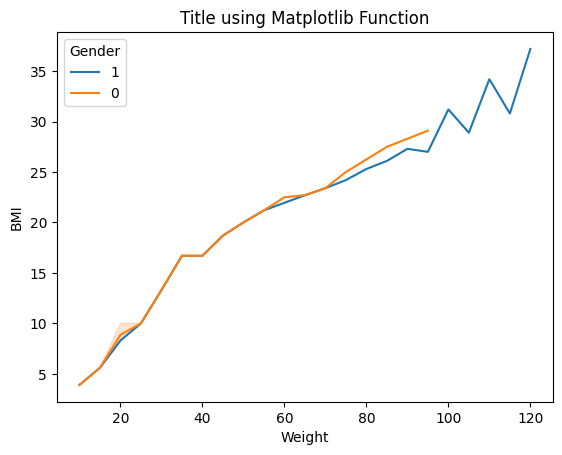

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# draw lineplot
sns.lineplot(x="Weight", y="BMI", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

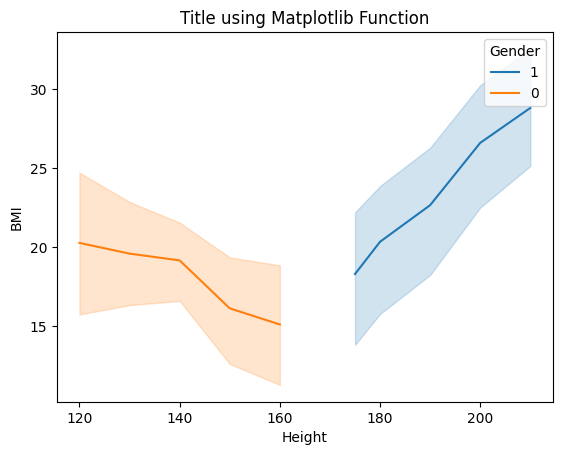

In [71]:
sns.lineplot(x="Height", y="BMI", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

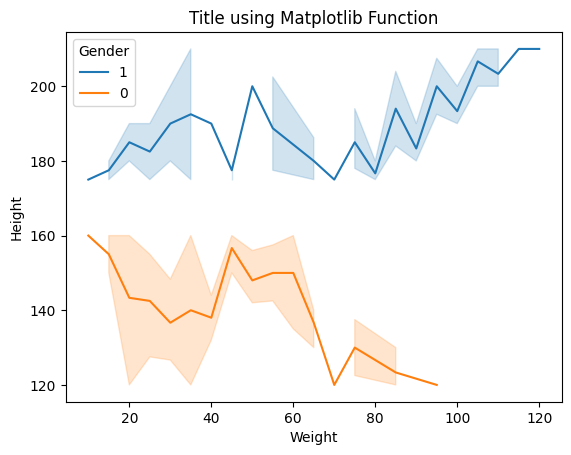

In [72]:
sns.lineplot(x="Weight", y="Height", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

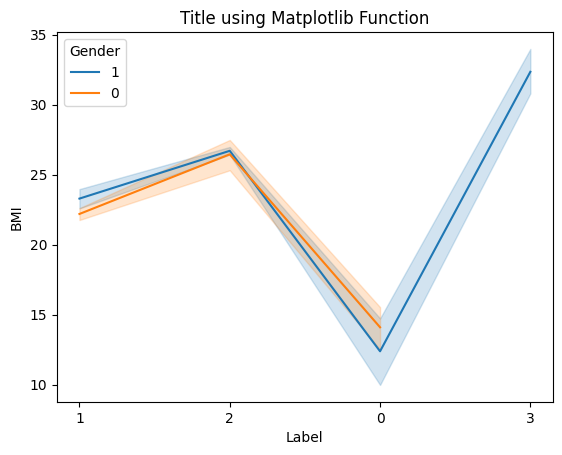

In [73]:
sns.lineplot(x="Label", y="BMI", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

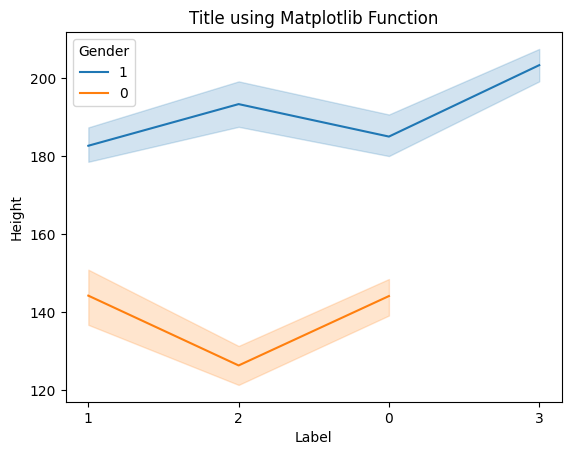

In [74]:
sns.lineplot(x="Label", y="Height", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

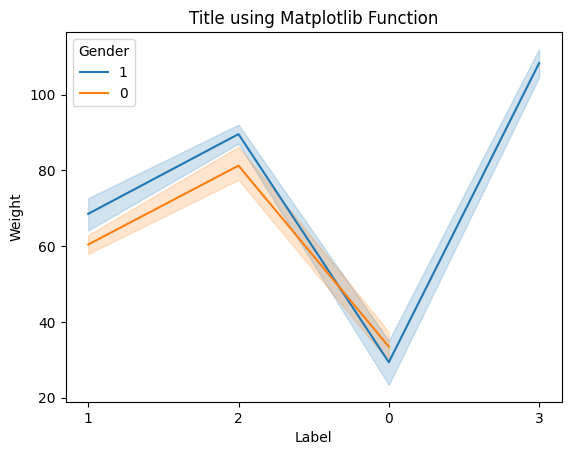

In [75]:
sns.lineplot(x="Label", y="Weight", data=df,hue='Gender')

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()